In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import difflib
%matplotlib inline

In [2]:
r = requests.get('https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt')
qs_dataset = r.json()['data']

In [3]:
qs_dataset[0]

{'cc': 'US',
 'core_id': '410',
 'country': 'United States',
 'guide': '<a href="/where-to-study/north-america/united-states/guide" class="guide-link" target="_blank">United States</a>',
 'logo': '<img src="https://www.topuniversities.com/sites/default/files/massachusetts-institute-of-technology-mit_410_small_0.jpg" alt="Massachusetts Institute of Technology (MIT)  Logo">',
 'nid': '294850',
 'rank_display': '1',
 'region': 'North America',
 'score': '100',
 'stars': '6',
 'title': 'Massachusetts Institute of Technology (MIT)',
 'url': '/universities/massachusetts-institute-technology-mit'}

In [4]:
def parseInt(numStr):
    cleaned = [x for x in numStr if x.isdigit()]
    return int("".join(cleaned))

def parseDecimal(numStr):
    cleaned = [x for x in numStr if x.isdigit() or x == '.']
    return float("".join(cleaned))
    
results = []
for university in qs_dataset[:200]:
    url = 'https://www.topuniversities.com' + university['url']
    details_html = requests.get(url)
    soup = BeautifulSoup(details_html.text, 'html.parser')

    def parseAttribute(className):
        attr = soup.find('div', class_=className)
        if attr is not None:
            return parseInt(attr.find('div', class_='number').text)
        else:
            return 0 # Missing value
        
    results.append({
            'name': university['title'],
            'rank': parseInt(university['rank_display']),
            'country': university['country'],
            'region': university['region'],
            'faculty_international': parseAttribute('inter faculty'),
            'faculty_total': parseAttribute('total faculty'),
            'students_international': parseAttribute('total inter'),
            'students_total': parseAttribute('total student')
        })

In [5]:
qs_df = pd.DataFrame.from_dict(results).set_index('name')
qs_df.to_pickle('qs_dataset')

In [6]:
qs_df = pd.read_pickle('qs_dataset')
qs_df.head()

,country,faculty_international,faculty_total,rank,region,students_international,students_total
name,,,,,,,
Massachusetts Institute of Technology (MIT),United States,1679,2982,1,North America,3717,11067
Stanford University,United States,2042,4285,2,North America,3611,15878
Harvard University,United States,1311,4350,3,North America,5266,22429
California Institute of Technology (Caltech),United States,350,953,4,North America,647,2255
University of Cambridge,United Kingdom,2278,5490,5,Europe,6699,18770


In [7]:
qs_df['faculty_students_ratio'] = qs_df['faculty_total']/qs_df['students_total']
qs_df['international_ratio'] = qs_df['students_international']/qs_df['students_total']
qs_df.head()

,country,faculty_international,faculty_total,rank,region,students_international,students_total,faculty_students_ratio,international_ratio
name,,,,,,,,,
Massachusetts Institute of Technology (MIT),United States,1679,2982,1,North America,3717,11067,0.269450,0.335863
Stanford University,United States,2042,4285,2,North America,3611,15878,0.269870,0.227422
Harvard University,United States,1311,4350,3,North America,5266,22429,0.193945,0.234785
California Institute of Technology (Caltech),United States,350,953,4,North America,647,2255,0.422616,0.286918
University of Cambridge,United Kingdom,2278,5490,5,Europe,6699,18770,0.292488,0.356899


In [8]:
qs_df.sort_values('faculty_students_ratio', ascending=False).head()

,country,faculty_international,faculty_total,rank,region,students_international,students_total,faculty_students_ratio,international_ratio
name,,,,,,,,,
California Institute of Technology (Caltech),United States,350,953,4,North America,647,2255,0.422616,0.286918
Yale University,United States,1708,4940,16,North America,2469,12402,0.398323,0.199081
University of Oxford,United Kingdom,2964,6750,6,Europe,7353,19720,0.342292,0.372870
University of Cambridge,United Kingdom,2278,5490,5,Europe,6699,18770,0.292488,0.356899
Johns Hopkins University,United States,1061,4462,17,North America,4105,16146,0.276353,0.254243


In [9]:
qs_df.sort_values('international_ratio', ascending=False).head()

,country,faculty_international,faculty_total,rank,region,students_international,students_total,faculty_students_ratio,international_ratio
name,,,,,,,,,
London School of Economics and Political Science (LSE),United Kingdom,687,1088,35,Europe,6748,9760,0.111475,0.691393
Ecole Polytechnique Fédérale de Lausanne (EPFL),Switzerland,1300,1695,12,Europe,5896,10343,0.163879,0.570047
Imperial College London,United Kingdom,2071,3930,8,Europe,8746,16090,0.244251,0.543567
Maastricht University,Netherlands,502,1277,200,Europe,8234,16385,0.077937,0.502533
Carnegie Mellon University,United States,425,1342,47,North America,6385,13356,0.100479,0.478062


In [24]:
def aggregate_analyze(df, grouping_col, value_col):
    maxIdx = df.groupby([grouping_col])[value_col].idxmax()
    res = df.loc[maxIdx][[grouping_col, 'name', value_col]].set_index(grouping_col)
    res.sort_values(value_col, ascending=False).plot.bar(sort_columns=True)
    display(res)

,name,faculty_students_ratio
country,,
Argentina,Universidad de Buenos Aires (UBA),0.134267
Australia,The Australian National University,0.110788
Austria,University of Vienna,0.074205
Belgium,Vrije Universiteit Brussel (VUB),0.193020
Brazil,Universidade de São Paulo,0.084948
Canada,McMaster University,0.136318
Chile,Pontificia Universidad Católica de Chile (UC),0.083694
China,Tsinghua University,0.151680
Denmark,Technical University of Denmark,0.238455


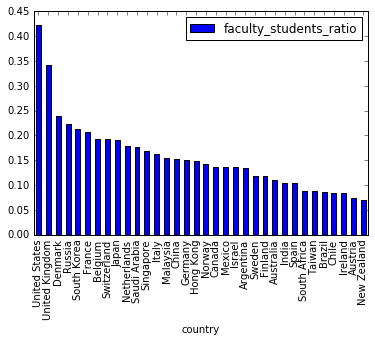

In [25]:
qs_df = qs_df.reset_index()
aggregate_analyze(qs_df, 'country', 'faculty_students_ratio')

,name,international_ratio
country,,
Argentina,Universidad de Buenos Aires (UBA),0.221658
Australia,The University of Melbourne,0.427434
Austria,University of Vienna,0.314748
Belgium,Vrije Universiteit Brussel (VUB),0.199591
Brazil,Universidade Estadual de Campinas (Unicamp),0.036354
Canada,McGill University,0.330825
Chile,Universidad de Chile,0.054932
China,Peking University,0.168265
Denmark,Technical University of Denmark,0.236314


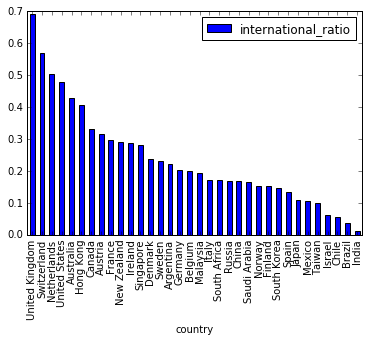

In [26]:
aggregate_analyze(qs_df, 'country', 'international_ratio')

,name,faculty_students_ratio
region,,
Africa,University of Cape Town,0.088450
Asia,Pohang University of Science And Technology (P...,0.213025
Europe,University of Oxford,0.342292
Latin America,Instituto Tecnológico y de Estudios Superiores...,0.136214
North America,California Institute of Technology (Caltech),0.422616
Oceania,The Australian National University,0.110788


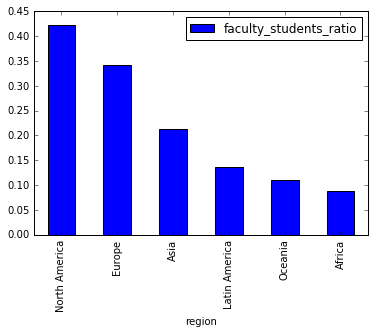

In [27]:
aggregate_analyze(qs_df, 'region', 'faculty_students_ratio')

,name,international_ratio
region,,
Africa,University of Cape Town,0.169703
Asia,The University of Hong Kong,0.407144
Europe,London School of Economics and Political Scien...,0.691393
Latin America,Universidad de Buenos Aires (UBA),0.221658
North America,Carnegie Mellon University,0.478062
Oceania,The University of Melbourne,0.427434


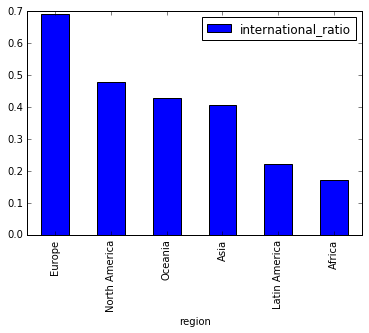

In [28]:
aggregate_analyze(qs_df, 'region', 'international_ratio')

In [15]:
r = requests.get('https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json')
the_dataset = r.json()['data']

In [16]:
the_dataset[0]

{'aliases': 'University of Oxford',
 'location': 'United Kingdom',
 'member_level': '0',
 'name': 'University of Oxford',
 'nid': 468,
 'rank': '1',
 'rank_order': '10',
 'record_type': 'master_account',
 'scores_citations': '99.1',
 'scores_citations_rank': '15',
 'scores_industry_income': '63.7',
 'scores_industry_income_rank': '169',
 'scores_international_outlook': '95.0',
 'scores_international_outlook_rank': '24',
 'scores_overall': '94.3',
 'scores_overall_rank': '10',
 'scores_research': '99.5',
 'scores_research_rank': '1',
 'scores_teaching': '86.7',
 'scores_teaching_rank': '5',
 'stats_female_male_ratio': '46 : 54',
 'stats_number_students': '20,409',
 'stats_pc_intl_students': '38%',
 'stats_student_staff_ratio': '11.2',
 'subjects_offered': 'Archaeology,Art, Performing Arts & Design,Biological Sciences,Business & Management,Chemical Engineering,Chemistry,Civil Engineering,Computer Science,Economics & Econometrics,Electrical & Electronic Engineering,General Engineering,Geo

In [36]:
results = []
for university in the_dataset[:200]:
    results.append({
            'name': university['name'],
            'rank': parseInt(university['rank']),
            'country': university['location'],
            'faculty_students_ratio': 1 / parseDecimal(university['stats_student_staff_ratio']),
            'international_ratio': parseDecimal(university['stats_pc_intl_students']) / 100,
            'students_total': parseInt(university['stats_number_students'])
        })

the_df = pd.DataFrame.from_dict(results).set_index('name')

# Compute derived attributes (where applicable)
the_df['students_international'] = (the_df['students_total'] * the_df['international_ratio']).astype('int')
the_df['faculty_total'] = (the_df['students_total'] * the_df['faculty_students_ratio']).astype('int')

In [37]:
# Map countries to regions using the QS dataset
mapping = qs_df[['country', 'region']].set_index('country').to_dict()['region']

# Manually add missing mappings
mapping['Luxembourg'] = 'Europe'
mapping['Russian Federation'] = 'Europe'

the_df['region'] = the_df['country'].replace(mapping)
the_df.head()

,country,faculty_students_ratio,international_ratio,rank,students_total,students_international,faculty_total,region
name,,,,,,,,
University of Oxford,United Kingdom,0.089286,0.38,1,20409,7755,1822,Europe
University of Cambridge,United Kingdom,0.091743,0.35,2,18389,6436,1687,Europe
California Institute of Technology,United States,0.153846,0.27,3,2209,596,339,North America
Stanford University,United States,0.133333,0.22,3,15845,3485,2112,North America
Massachusetts Institute of Technology,United States,0.114943,0.34,5,11177,3800,1284,North America


,name,faculty_students_ratio
country,,
Australia,Australian National University,0.051813
Austria,University of Vienna,0.048077
Belgium,Ghent University,0.027855
Canada,McGill University,0.075188
China,University of Science and Technology of China,0.121951
Denmark,University of Copenhagen,0.243902
Finland,University of Helsinki,0.061728
France,École Polytechnique,0.196078
Germany,LMU Munich,0.064103


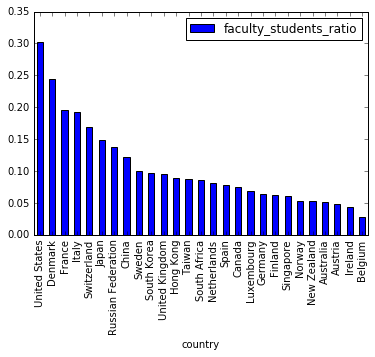

In [38]:
the_df = the_df.reset_index()
aggregate_analyze(the_df, 'country', 'faculty_students_ratio')

,name,international_ratio
country,,
Australia,University of Melbourne,0.40
Austria,University of Vienna,0.26
Belgium,Université Libre de Bruxelles,0.35
Canada,University of British Columbia,0.29
China,Peking University,0.16
Denmark,Technical University of Denmark,0.24
Finland,Aalto University,0.20
France,École Polytechnique,0.36
Germany,Technical University of Munich,0.23


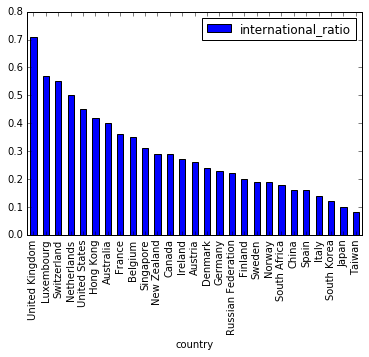

In [39]:
aggregate_analyze(the_df, 'country', 'international_ratio')

,name,faculty_students_ratio
region,,
Africa,University of Cape Town,0.085470
Asia,University of Tokyo,0.149254
Europe,University of Copenhagen,0.243902
North America,Vanderbilt University,0.303030
Oceania,University of Auckland,0.053191


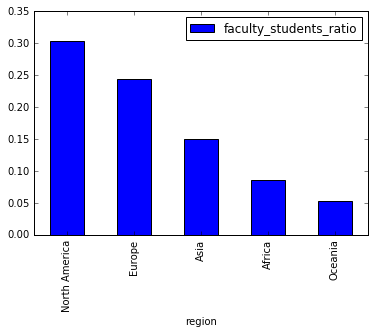

In [40]:
aggregate_analyze(the_df, 'region', 'faculty_students_ratio')

,name,international_ratio
region,,
Africa,University of Cape Town,0.18
Asia,University of Hong Kong,0.42
Europe,London School of Economics and Political Science,0.71
North America,Carnegie Mellon University,0.45
Oceania,University of Melbourne,0.40


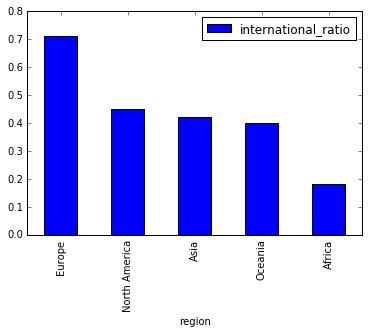

In [41]:
aggregate_analyze(the_df, 'region', 'international_ratio')

In [57]:
qs_df = qs_df.set_index('name')
the_df = the_df.set_index('name')
qs_df.set_index('name')
the_df.index = the_df.index.map(lambda x: difflib.get_close_matches(x, qs_df.index, 1)[0])
qs_df

IndexError: list index out of range